In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
df = pd.read_excel('./Attachment 1.xlsx')

In [3]:
df

,日期(年/月/日) (Date Y/M/D),发货城市 (Delivering city),收货城市 (Receiving city),快递运输数量(件) (Express delivery quantity (PCS))
0,2018-04-19,A,O,45
1,2018-04-19,S,R,51
2,2018-04-19,S,Q,42
3,2018-04-19,S,L,56
4,2018-04-19,S,I,42
...,...,...,...,...
16958,2019-04-17,J,H,47
16959,2019-04-17,I,J,220
16960,2019-04-17,I,E,70
16961,2019-04-17,K,H,241


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16963 entries, 0 to 16962
Data columns (total 4 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   日期(年/月/日) (Date Y/M/D)                       16963 non-null  datetime64[ns]
 1   发货城市 (Delivering city)                       16963 non-null  object        
 2   收货城市 (Receiving city)                        16963 non-null  object        
 3   快递运输数量(件) (Express delivery quantity (PCS))  16963 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 530.2+ KB


In [5]:
df.rename(columns={'日期(年/月/日) (Date Y/M/D)': '日期', '发货城市 (Delivering city)': '发货城市', '收货城市 (Receiving city)': '收货城市','快递运输数量(件) (Express delivery quantity (PCS))':'快递运输数量'})

,日期,发货城市,收货城市,快递运输数量
0,2018-04-19,A,O,45
1,2018-04-19,S,R,51
2,2018-04-19,S,Q,42
3,2018-04-19,S,L,56
4,2018-04-19,S,I,42
...,...,...,...,...
16958,2019-04-17,J,H,47
16959,2019-04-17,I,J,220
16960,2019-04-17,I,E,70
16961,2019-04-17,K,H,241


In [6]:
df.rename(columns={'日期(年/月/日) (Date Y/M/D)': '日期', '发货城市 (Delivering city)': '发货城市', '收货城市 (Receiving city)': '收货城市','快递运输数量(件) (Express delivery quantity (PCS))':'快递运输数量'},inplace=True)

In [7]:
df

,日期,发货城市,收货城市,快递运输数量
0,2018-04-19,A,O,45
1,2018-04-19,S,R,51
2,2018-04-19,S,Q,42
3,2018-04-19,S,L,56
4,2018-04-19,S,I,42
...,...,...,...,...
16958,2019-04-17,J,H,47
16959,2019-04-17,I,J,220
16960,2019-04-17,I,E,70
16961,2019-04-17,K,H,241


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16963 entries, 0 to 16962
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   日期      16963 non-null  datetime64[ns]
 1   发货城市    16963 non-null  object        
 2   收货城市    16963 non-null  object        
 3   快递运输数量  16963 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 530.2+ KB


In [9]:
# 将日期转换为datetime格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

In [10]:
# 计算每个城市每天的发货量和收货量
df_deliver_daily = df.groupby(['发货城市', '日期'])['快递运输数量'].sum().reset_index().rename(columns={'快递运输数量': '发货量'})
df_receive_daily = df.groupby(['收货城市', '日期'])['快递运输数量'].sum().reset_index().rename(columns={'快递运输数量': '收货量'})

# 计算每个城市的单日最大发货量和单日最大收货量
df_deliver_max = df_deliver_daily.groupby('发货城市')['发货量'].max().reset_index().rename(columns={'发货量': '单日最大发货量'})
df_receive_max = df_receive_daily.groupby('收货城市')['收货量'].max().reset_index().rename(columns={'收货量': '单日最大收货量'})

In [11]:
df_deliver_max

,发货城市,单日最大发货量
0,A,420
1,B,340
2,C,181
3,D,303
4,E,267
5,G,2081
6,H,559
7,I,538
8,J,834
9,K,682


In [12]:
df_receive_max

,收货城市,单日最大收货量
0,A,426
1,B,455
2,C,104
3,D,376
4,E,224
5,G,2280
6,H,531
7,I,720
8,J,895
9,K,677


In [13]:
df_city1 = pd.merge(df_deliver_max, df_receive_max, left_on='发货城市', right_on='收货城市', how='outer').fillna(0)

In [14]:
df_city1

,发货城市,单日最大发货量,收货城市,单日最大收货量
0,A,420,A,426.0
1,B,340,B,455.0
2,C,181,C,104.0
3,D,303,D,376.0
4,E,267,E,224.0
5,G,2081,G,2280.0
6,H,559,H,531.0
7,I,538,I,720.0
8,J,834,J,895.0
9,K,682,K,677.0


In [15]:
df_city1.drop(['收货城市'],axis=1,inplace=True)

In [16]:
df_city1.rename(columns={'发货城市':'城市'},inplace=True)

In [17]:
df_city1

,城市,单日最大发货量,单日最大收货量
0,A,420,426.0
1,B,340,455.0
2,C,181,104.0
3,D,303,376.0
4,E,267,224.0
5,G,2081,2280.0
6,H,559,531.0
7,I,538,720.0
8,J,834,895.0
9,K,682,677.0


In [18]:
# 计算每个城市的发货量、收货量和快递总量
df_deliver = df.groupby('发货城市')['快递运输数量'].sum().reset_index().rename(columns={'快递运输数量': '发货量'})
df_receive = df.groupby('收货城市')['快递运输数量'].sum().reset_index().rename(columns={'快递运输数量': '收货量'})

In [19]:
df_deliver

,发货城市,发货量
0,A,31276
1,B,12458
2,C,18361
3,D,31135
4,E,14643
5,G,287248
6,H,45866
7,I,45100
8,J,99173
9,K,74841


In [20]:
df_receive

,收货城市,收货量
0,A,51708
1,B,15624
2,C,13228
3,D,52401
4,E,20055
5,G,273737
6,H,47155
7,I,50855
8,J,98557
9,K,71003


In [21]:
df_city2 = pd.merge(df_deliver, df_receive, left_on='发货城市', right_on='收货城市', how='outer').fillna(0)

In [22]:
df_city2['快递总量'] = df_city2['发货量'] + df_city2['收货量']

In [23]:
df_city2.drop(['收货城市'],axis=1,inplace=True)

In [24]:
df_city2.rename(columns={'发货城市':'城市'},inplace=True)

In [25]:
df_city2

,城市,发货量,收货量,快递总量
0,A,31276,51708.0,82984.0
1,B,12458,15624.0,28082.0
2,C,18361,13228.0,31589.0
3,D,31135,52401.0,83536.0
4,E,14643,20055.0,34698.0
5,G,287248,273737.0,560985.0
6,H,45866,47155.0,93021.0
7,I,45100,50855.0,95955.0
8,J,99173,98557.0,197730.0
9,K,74841,71003.0,145844.0


In [26]:
df_city = pd.merge(df_city1, df_city2, on='城市')

In [27]:
df_city

,城市,单日最大发货量,单日最大收货量,发货量,收货量,快递总量
0,A,420,426.0,31276,51708.0,82984.0
1,B,340,455.0,12458,15624.0,28082.0
2,C,181,104.0,18361,13228.0,31589.0
3,D,303,376.0,31135,52401.0,83536.0
4,E,267,224.0,14643,20055.0,34698.0
5,G,2081,2280.0,287248,273737.0,560985.0
6,H,559,531.0,45866,47155.0,93021.0
7,I,538,720.0,45100,50855.0,95955.0
8,J,834,895.0,99173,98557.0,197730.0
9,K,682,677.0,74841,71003.0,145844.0


In [28]:
# 计算每个城市的快递数量增长速度
# 按照发货城市和日期进行分组
df_grouped = df.groupby(['发货城市', '日期'])

In [29]:
# 计算每个分组中的快递总量并排序
df_sorted = df_grouped['快递运输数量'].sum().reset_index().sort_values(['发货城市', '日期']).rename(columns={'发货城市': '城市'})

In [30]:
df_sorted

,城市,日期,快递运输数量
0,A,2018-04-19,89
1,A,2018-04-20,87
2,A,2018-04-21,87
3,A,2018-04-22,42
4,A,2018-04-23,85
...,...,...,...
5012,Y,2019-04-12,386
5013,Y,2019-04-13,487
5014,Y,2019-04-14,481
5015,Y,2019-04-15,449


In [31]:
df_sorted = df_sorted[df_sorted['快递运输数量'] != 0]

In [32]:
df_sorted

,城市,日期,快递运输数量
0,A,2018-04-19,89
1,A,2018-04-20,87
2,A,2018-04-21,87
3,A,2018-04-22,42
4,A,2018-04-23,85
...,...,...,...
5012,Y,2019-04-12,386
5013,Y,2019-04-13,487
5014,Y,2019-04-14,481
5015,Y,2019-04-15,449


In [33]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4902 entries, 0 to 5016
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   城市      4902 non-null   object        
 1   日期      4902 non-null   datetime64[ns]
 2   快递运输数量  4902 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 153.2+ KB


In [34]:
# 计算每个分组中快递总量的增长幅度
df_sorted = df_sorted.copy()
df_sorted.loc[:, '快递数量增长幅度'] = df_sorted.groupby('城市')['快递运输数量'].pct_change()

In [35]:
df_sorted

,城市,日期,快递运输数量,快递数量增长幅度
0,A,2018-04-19,89,NaN
1,A,2018-04-20,87,-0.022472
2,A,2018-04-21,87,0.000000
3,A,2018-04-22,42,-0.517241
4,A,2018-04-23,85,1.023810
...,...,...,...,...
5012,Y,2019-04-12,386,-0.091765
5013,Y,2019-04-13,487,0.261658
5014,Y,2019-04-14,481,-0.012320
5015,Y,2019-04-15,449,-0.066528


In [36]:
df_sorted['快递数量增长幅度'].fillna(0, inplace=True)

In [37]:
# 取每个发货城市的增长幅度平均值作为其快递数量增长速度
df_growth = df_sorted.groupby('城市')['快递数量增长幅度'].mean().reset_index()
df_growth.rename(columns={'快递数量增长幅度': '快递数量增长速度'}, inplace=True)
df_growth

,城市,快递数量增长速度
0,A,0.086167
1,B,0.100530
2,C,0.122279
3,D,0.171837
4,E,0.059521
5,G,0.062744
6,H,0.095277
7,I,0.121258
8,J,0.088237
9,K,0.087455


In [38]:
df_city

,城市,单日最大发货量,单日最大收货量,发货量,收货量,快递总量
0,A,420,426.0,31276,51708.0,82984.0
1,B,340,455.0,12458,15624.0,28082.0
2,C,181,104.0,18361,13228.0,31589.0
3,D,303,376.0,31135,52401.0,83536.0
4,E,267,224.0,14643,20055.0,34698.0
5,G,2081,2280.0,287248,273737.0,560985.0
6,H,559,531.0,45866,47155.0,93021.0
7,I,538,720.0,45100,50855.0,95955.0
8,J,834,895.0,99173,98557.0,197730.0
9,K,682,677.0,74841,71003.0,145844.0


In [39]:
# 合并到原数据中
df_city = pd.merge(df_city, df_growth, on='城市', how='left')

In [40]:
df_city

,城市,单日最大发货量,单日最大收货量,发货量,收货量,快递总量,快递数量增长速度
0,A,420,426.0,31276,51708.0,82984.0,0.086167
1,B,340,455.0,12458,15624.0,28082.0,0.100530
2,C,181,104.0,18361,13228.0,31589.0,0.122279
3,D,303,376.0,31135,52401.0,83536.0,0.171837
4,E,267,224.0,14643,20055.0,34698.0,0.059521
5,G,2081,2280.0,287248,273737.0,560985.0,0.062744
6,H,559,531.0,45866,47155.0,93021.0,0.095277
7,I,538,720.0,45100,50855.0,95955.0,0.121258
8,J,834,895.0,99173,98557.0,197730.0,0.088237
9,K,682,677.0,74841,71003.0,145844.0,0.087455


In [41]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   城市        24 non-null     object 
 1   单日最大发货量   24 non-null     int64  
 2   单日最大收货量   24 non-null     float64
 3   发货量       24 non-null     int64  
 4   收货量       24 non-null     float64
 5   快递总量      24 non-null     float64
 6   快递数量增长速度  24 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [42]:
from sklearn.preprocessing import MinMaxScaler

# 数据归一化并进行平移变换
scaler = MinMaxScaler()
cols_to_normalize = ['单日最大发货量', '单日最大收货量','发货量', '收货量', '快递总量', '快递数量增长速度']
df_normalized = pd.DataFrame(scaler.fit_transform(df_city[cols_to_normalize]), columns=cols_to_normalize)

# 对归一化后的数据进行乘以100操作
df_normalized *= 100

In [43]:
df_normalized

,单日最大发货量,单日最大收货量,发货量,收货量,快递总量,快递数量增长速度
0,11.392968,18.684211,6.617016,16.610931,9.464997,40.186745
1,7.832666,19.956140,0.000000,5.019130,0.000000,50.214464
2,0.756564,4.561404,2.075685,4.249427,0.604600,65.399549
3,6.186026,16.491228,6.567436,16.833553,9.560161,100.000000
4,4.583890,9.824561,0.768317,6.442566,1.140585,21.582448
5,85.313752,100.000000,96.625033,87.936612,91.871432,23.833050
6,17.578994,23.289474,11.747331,15.148303,11.195356,46.546806
7,16.644415,31.578947,11.477981,16.336909,11.701172,64.686242
8,29.817534,39.254386,30.491793,31.660932,29.246983,41.631590
9,23.052960,29.692982,21.935876,22.809351,20.301938,41.085957


In [44]:
def calculate_entropy_weights(df):
    """利用熵权法计算权重"""
    # 计算概率矩阵
    prob_matrix = df.apply(lambda x: x / x.sum(), axis=0)
    prob_matrix = prob_matrix.replace(0, 1e-10)  # 将值为0的元素替换为1e-10
    # 计算熵值
    entropy = (-1) * prob_matrix * np.log(prob_matrix)
    entropy = entropy.sum()
    # 计算权重
    weights = (1 - entropy / np.log(len(df.columns))).tolist()
    # 如果有负数权重，进行转换
    if any(w < 0 for w in weights):
        min_weight = min(weights)
        new_weights = [w + abs(min_weight) for w in weights]
        weights = [w / sum(new_weights) for w in new_weights]
    return weights


In [45]:
weights = calculate_entropy_weights(df_normalized)

In [46]:
weights

[0.1475543148191753,
 0.0948816831343255,
 0.26812663057286507,
 0.18134581740399533,
 0.3080915540696388,
 0.0]

In [48]:
def calculate_score(row, weights):

    score = (row[cols_to_normalize] * weights).sum()
    return score

df_city['得分'] = df_normalized.apply(lambda row: calculate_score(row, weights), axis=1)

In [49]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   城市        24 non-null     object 
 1   单日最大发货量   24 non-null     int64  
 2   单日最大收货量   24 non-null     float64
 3   发货量       24 non-null     int64  
 4   收货量       24 non-null     float64
 5   快递总量      24 non-null     float64
 6   快递数量增长速度  24 non-null     float64
 7   得分        24 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 1.7+ KB


In [48]:
df_city

,城市,单日最大发货量,单日最大收货量,发货量,收货量,快递总量,快递数量增长速度,得分
0,A,420,426.0,31276,51708.0,82984.0,0.086167,11.156478
1,B,340,455.0,12458,15624.0,28082.0,0.100530,3.959414
2,C,181,104.0,18361,13228.0,31589.0,0.122279,2.057862
3,D,303,376.0,31135,52401.0,83536.0,0.171837,10.236494
4,E,267,224.0,14643,20055.0,34698.0,0.059521,3.334287
5,G,2081,2280.0,287248,273737.0,560985.0,0.062744,92.236074
6,H,559,531.0,45866,47155.0,93021.0,0.095277,14.149649
7,I,538,720.0,45100,50855.0,95955.0,0.121258,15.097434
8,J,834,895.0,99173,98557.0,197730.0,0.088237,31.052216
9,K,682,677.0,74841,71003.0,145844.0,0.087455,22.491712


In [54]:
df_sorted= df_city.sort_values(by='得分', ascending=False)

In [56]:
df_sorted

,城市,单日最大发货量,单日最大收货量,发货量,收货量,快递总量,快递数量增长速度,得分
10,L,2411,2268.0,296846,311289.0,608135.0,0.060412,99.950062
5,G,2081,2280.0,287248,273737.0,560985.0,0.062744,92.236074
20,V,1218,1478.0,164403,192823.0,357226.0,0.073617,56.113123
16,R,1133,1060.0,109685,91333.0,201018.0,0.071084,34.447198
22,X,1090,1371.0,89437,84303.0,173740.0,0.112930,31.691630
8,J,834,895.0,99173,98557.0,197730.0,0.088237,31.052216
13,O,859,1132.0,64986,87091.0,152077.0,0.087234,25.886637
21,W,967,981.0,69505,77336.0,146841.0,0.163322,25.547122
9,K,682,677.0,74841,71003.0,145844.0,0.087455,22.491712
15,Q,612,949.0,60654,81076.0,141730.0,0.085170,22.194689


In [58]:
#配置字体参数雅黑
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
#安装字体
plt.rcParams['font.sans-serif'] = 'SimHei'
#配置矢量图
%config InlineBack终点.figure_format = 'svg'

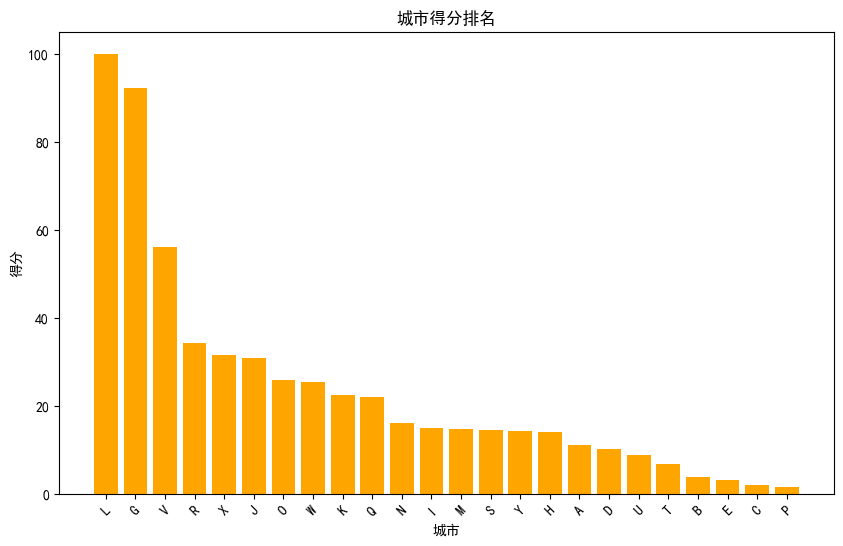

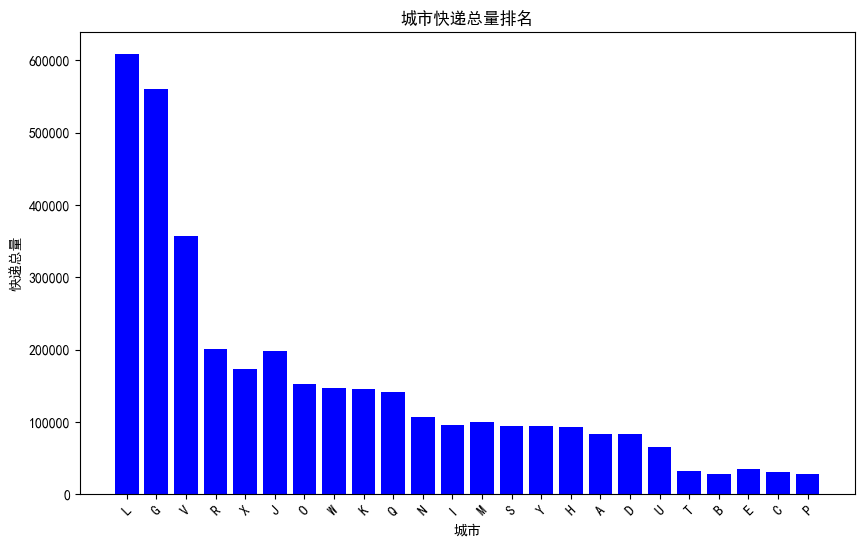

In [59]:
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['城市'], df_sorted['得分'], color='orange')
plt.xticks(rotation=45)
plt.xlabel('城市')
plt.ylabel('得分')
plt.title('城市得分排名')
plt.show()

# 绘制快递总量图
plt.figure(figsize=(10, 6))
plt.bar(df_sorted['城市'], df_sorted['快递总量'], color='blue')
plt.xticks(rotation=45)
plt.xlabel('城市')
plt.ylabel('快递总量')
plt.title('城市快递总量排名')
plt.show()

In [49]:
top5_cities = df_city[['城市', '得分']].sort_values('得分', ascending=False).head(5)
print(top5_cities)

   城市         得分
10  L  99.950062
5   G  92.236074
20  V  56.113123
16  R  34.447198
22  X  31.691630
